## Contrato Spot

In [91]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Load the 'Contrato regular' data
file_path_spot = 'contrato_spot.csv'
contrato_spot_df = pd.read_csv(file_path_spot)

# Define the columns to use for training
features = ['Nº Material', 'Lbmo Material', 'Total Factura', 'Costo Total', 'margen Venta']
target = 'Base Fixed'

# Handle missing values (if any)
contrato_spot_df = contrato_spot_df.dropna(subset=features + [target])
# contrato_spot_df.head()

In [92]:
# Normalize the feature values between 0 and 1
scaler = MinMaxScaler()
contrato_spot_df[['Lbmo Material', 'Total Factura', 'Costo Total', 'margen Venta']] = scaler.fit_transform(contrato_spot_df[['Lbmo Material', 'Total Factura', 'Costo Total', 'margen Venta']])


X_spot = contrato_spot_df[['Nº Material', 'Lbmo Material', 'Total Factura', 'Costo Total', 'margen Venta']]
y_spot = contrato_spot_df[[target]]

In [93]:
unique_materials = X_spot['Nº Material'].unique()
unique_materials

array([2020, 1000, 2010, 2000, 2130, 2070, 2210])

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X_spot, y_spot, test_size=0.2, random_state=42)

spot_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [95]:
spot_model.fit(X_train, y_train)

f:\Hassan\sales_price\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [96]:
y_pred_train = spot_model.predict(X_train)
y_pred_test = spot_model.predict(X_test)

r2 = r2_score(y_test, y_pred_test)
rmse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)

print('R2:', r2)
print('MSE:', rmse)
print('MAE:', mae)

R2: 0.8376229366295352
MSE: 3332.6870978841425
MAE: 8.250114729521494


In [30]:
# X_combined = pd.concat([X_train, X_test], axis=0)
# y_combined_actual = pd.concat([y_train, y_test], axis=0)
# y_combined_pred = pd.Series(list(y_pred_train) + list(y_pred_test), index=y_combined_actual.index)

# result = X_combined.copy()
# result['Actual Sales Price'] = y_combined_actual
# result['Predicted Sales Price'] = y_combined_pred

# result['Dataset'] = ['Train'] * len(X_train) + ['Test'] * len(X_test)

# result.to_csv('Contrato Spot with actual and predicted values.csv', index=False)

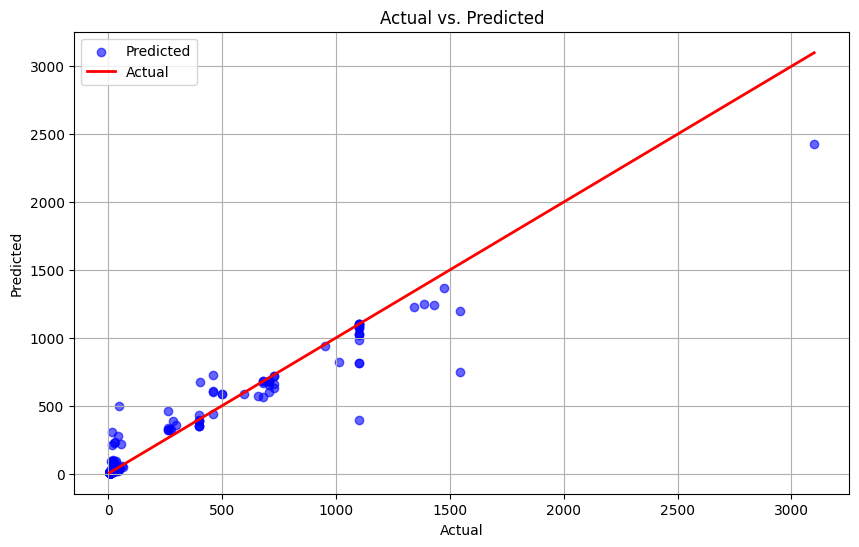

In [97]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_train, color='blue', alpha=0.6)
plt.scatter(y_test, y_pred_test, color='blue', label='Predicted', alpha=0.6)
plt.plot([y_train.min(), y_train.max()],
         [y_train.min(), y_train.max()],
         color='red', lw=2, label='Actual')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
# Save the Model and fitted scaler

import pickle
model_and_scaler = {'model':spot_model, 
                    'scaler':scaler}
with open('Spot_Model_and_scaler.pkl', 'wb') as f:
    pickle.dump(model_and_scaler, f)

In [10]:
# Prediction Fucntion

def predict(N_material, Lbmo_material, Total_Factura, Costo_Total, margen_venta, model=spot_model):
    if N_material not in [2020, 1000, 2010, 2000, 2130, 2070, 2210]:
        raise ValueError("Error: The chosen 'Nº Material' is not recognized by the model.")
    
    features = np.array([Lbmo_material, Total_Factura, Costo_Total, margen_venta]).reshape(1,-1)    # normalize the features excluding N_material
    scaled = scaler.transform(features)
    
    # prediction = model.predict(N_material, scaled)
    inputs = np.hstack([[N_material], scaled[0]])   # Add N_material to the features list
    input_data = inputs.reshape(1,-1)
    prediction = model.predict(input_data)
    
    return prediction

In [36]:
def predictions(features:list, model=spot_model):                      # features = [{}, {}]       
                                                                       # features = {N_material, Lbmo_material, Total_Factura, Costo_Total, margen_venta}
    sales_prices = []
    for feature in features:
        if feature['N_material'] not in [2020, 1000, 2010, 2000, 2130, 2070, 2210]:
            # raise ValueError("Error: The chosen 'Nº Material' is not recognized by the model.")
            sales_prices.append("Error: The chosen 'Nº Material' is not recognized by the model.")
            continue
        
        feats = np.array([feature['Lbmo_material'], feature['Total_factura'], feature['Costo_total'], feature['Margen_venta']]).reshape(1,-1)    # normalize the features excluding N_material
        scaled = scaler.transform(feats)
        
         # prediction = model.predict(N_material, scaled)
        inputs = np.hstack([[feature['N_material']], scaled[0]])   # Add N_material to the features list
        input_data = inputs.reshape(1,-1)
        prediction = model.predict(input_data)
        
        sales_prices.append(prediction)
    
    return sales_prices

In [22]:
def predictions(features:list, model=spot_model):       
    sales_prices = []
    
    for feature in features:
        if feature[0] not in [2020, 1000, 2010, 2000, 2130, 2070, 2210]:
            # raise ValueError("Error: The chosen 'Nº Material' is not recognized by the model.")
            sales_prices.append("Error: The chosen 'Nº Material' is not recognized by the model.")
            continue
        
        feats = np.array([feature[1], feature[2], feature[3], feature[4]]).reshape(1,-1)    # normalize the features excluding N_material
        scaled = scaler.transform(feats)
        
         # prediction = model.predict(N_material, scaled)
        inputs = np.hstack([[feature[0]], scaled[0]])   # Add N_material to the features list
        input_data = inputs.reshape(1,-1)
        prediction = model.predict(input_data)
        
        sales_prices.append(prediction)
    
    return sales_prices

In [37]:
# sales_price = predictions([[2020, 26746, 244725, 237527.73, 7198.17], [303, 26746, 244725, 237527.73, 7198.17], [2000, 26746, 244725, 237527.73, 7198.17]])
predictions([{'N_material':2020, 'Lbmo_material':26746, 'Total_factura':244725, 'Costo_total':237527.73, 'Margen_venta':7198.17},
             {'N_material':3020, 'Lbmo_material':26746, 'Total_factura':244725, 'Costo_total':237527.73, 'Margen_venta':7198.17}]) 

# {N_material, Lbmo_material, Total_Factura, Costo_Total, margen_venta}

f:\Hassan\sales_price\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
f:\Hassan\sales_price\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[array([9.1555]),
 "Error: The chosen 'Nº Material' is not recognized by the model."]

In [28]:
sales_price

[array([9.1555]),
 "Error: The chosen 'Nº Material' is not recognized by the model.",
 array([10.1241])]

## Contrato Regular

*Three models are made for predicting each element for sales price*

In [98]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import pickle

# Load the 'Contrato Regular' data
file_path_regular = 'contrato_regular.csv'  # Update this path to your local file
contrato_regular_df = pd.read_csv(file_path_regular)

# Define the features and targets
features = ['Nº Material', 'Lbmo Material', 'Total Factura', 'Costo Total', 'margen Venta']
targets = ['Precio Unitario Venta  US$/Lb', 'Surcharge', 'Factor BQM']

# Handle missing values (drop rows with missing data in any of the target columns)
contrato_regular_df = contrato_regular_df.dropna(subset=features + targets)

In [99]:
contrato_regular_df['Nº Material'].unique()

array([2020, 2000, 2010])

In [100]:
# Normalize the feature values between 0 and 1
scaler = MinMaxScaler()
contrato_regular_df[['Lbmo Material', 'Total Factura', 'Costo Total', 'margen Venta']] = scaler.fit_transform(contrato_regular_df[['Lbmo Material', 'Total Factura', 'Costo Total', 'margen Venta']])

# Prepare the feature matrix (X)
X = contrato_regular_df[features]

In [101]:
# Normalize the target values between 0 and 1
scalers_targets = {}
for target in targets:
    scaler_target = MinMaxScaler()
    contrato_regular_df[[target]] = scaler_target.fit_transform(contrato_regular_df[[target]])
    scalers_targets[target] = scaler_target

f:\Hassan\sales_price\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


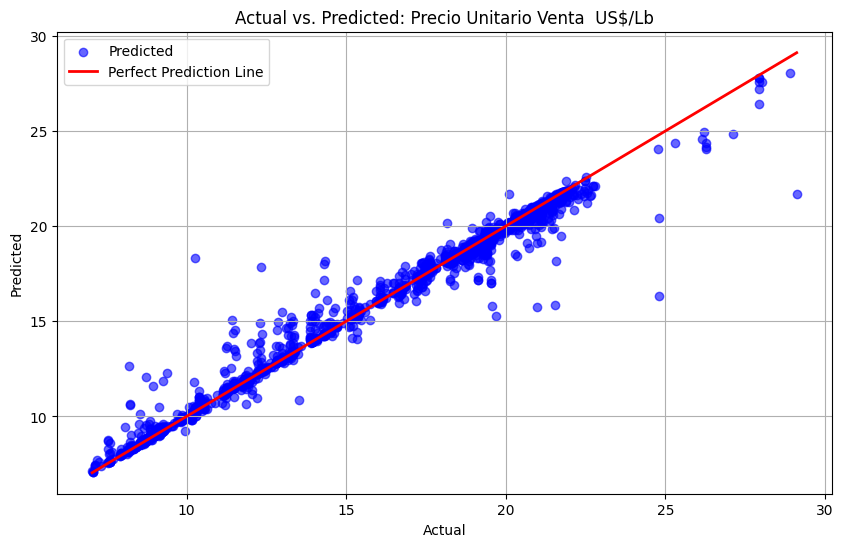

f:\Hassan\sales_price\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


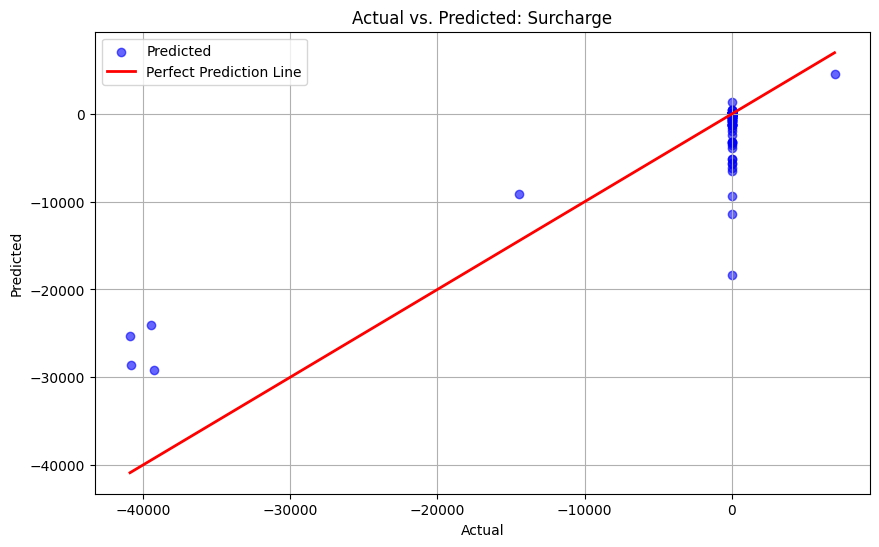

f:\Hassan\sales_price\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


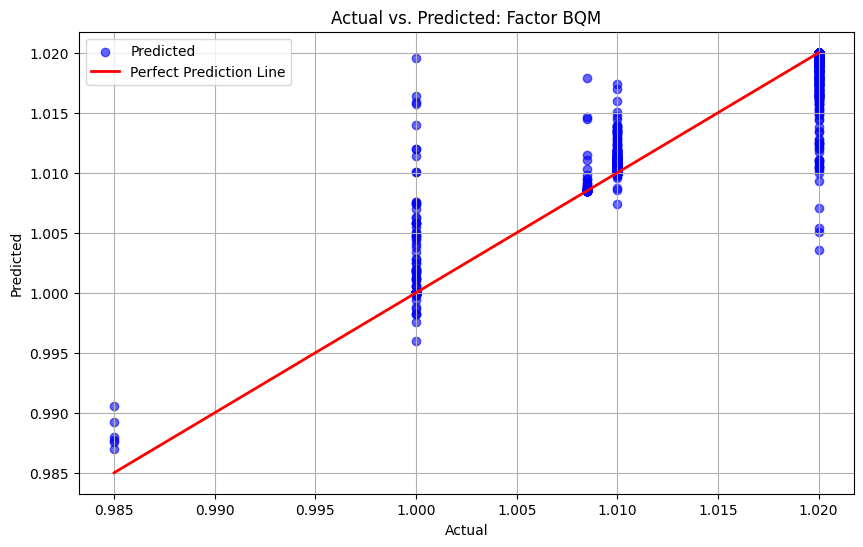

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Assuming you have defined your targets, X, contrato_regular_df, and scalers_targets

models = {}
results = {}
values_dict = {}

# Initialize an empty DataFrame to hold all X, actual, and predicted values for all targets
final_df = pd.DataFrame()

for target in targets:
    y = contrato_regular_df[[target]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train.values.ravel())
    
    # Predictions on both training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Unscale the predictions and the target values for training and testing
    y_train_pred_unscaled = scalers_targets[target].inverse_transform(y_train_pred.reshape(-1, 1)).flatten()
    y_test_pred_unscaled = scalers_targets[target].inverse_transform(y_test_pred.reshape(-1, 1)).flatten()
    y_train_unscaled = scalers_targets[target].inverse_transform(y_train).flatten()
    y_test_unscaled = scalers_targets[target].inverse_transform(y_test).flatten()
    
    # Combine actual and predicted values for train and test data
    actual = list(y_train_unscaled) + list(y_test_unscaled)
    predicted = list(y_train_pred_unscaled) + list(y_test_pred_unscaled)
    
    # Save the actual and predicted values in the dictionary with 2 keys per target
    values_dict[f'{target}_Actual'] = actual
    values_dict[f'{target}_Predicted'] = predicted
    
    # Combine the training and testing sets for X
    X_combined = pd.concat([X_train, X_test], axis=0)
    
    # Add the X columns to the final DataFrame only once (for the first target)
    if final_df.empty:
        final_df = X_combined.reset_index(drop=True)
    
    # Add the actual and predicted values as new columns to the final DataFrame
    final_df[f'{target}_Actual'] = actual
    final_df[f'{target}_Predicted'] = predicted
    
    # Calculate metrics for the test set
    rmse = mean_squared_error(y_test_unscaled, y_test_pred_unscaled, squared=False)  # RMSE
    r2 = r2_score(y_test_unscaled, y_test_pred_unscaled)
    mae = mean_absolute_error(y_test_unscaled, y_test_pred_unscaled)
    
    models[target] = model
    
    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.scatter(y_train_unscaled, y_train_pred_unscaled, color='blue', alpha=0.6)
    plt.scatter(y_test_unscaled, y_test_pred_unscaled, color='blue', label='Predicted', alpha=0.6)
    plt.plot([min(y_train_unscaled.min(), y_test_unscaled.min()), max(y_train_unscaled.max(), y_test_unscaled.max())],
             [min(y_train_unscaled.min(), y_test_unscaled.min()), max(y_train_unscaled.max(), y_test_unscaled.max())], 
             color='red', lw=2, label='Perfect Prediction Line')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Actual vs. Predicted: {target}')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    results[target] = {'MAE': mae, 'RMSE': rmse, 'R²': r2}

# Now final_df contains the X columns followed by the actual and predicted values for all targets
# print(final_df.head())  # View the first few rows of the DataFrame


In [103]:
final_df['sales_price_actual'] = (final_df['Precio Unitario Venta  US$/Lb_Actual'] * final_df['Factor BQM_Actual']) + final_df['Surcharge_Actual']
final_df['sales_price_predicted'] = (final_df['Precio Unitario Venta  US$/Lb_Predicted'] * final_df['Factor BQM_Predicted']) + final_df['Surcharge_Predicted']

In [90]:
# final_df.to_csv('Contrato Regular with actual and predicted values for all targets', index=False)

In [104]:
# Display the evaluation metrics for each model
print("Model Evaluation Metrics:")
for target, metrics in results.items():
    print(f"- MAE: {metrics['MAE']}, RMSE: {metrics['RMSE']}, R²: {metrics['R²']}")

Model Evaluation Metrics:
- MAE: 0.40591229656419525, RMSE: 1.0083241466869886, R²: 0.9514436312179207
- MAE: 96.31712784017132, RMSE: 1015.0843089207015, R²: -982120.7112028265
- MAE: 0.001111871609403253, RMSE: 0.0031017132799870074, R²: 0.8788401731704018


In [6]:
def predict_sales_price(N_Material, Lbmo_material, Total_Factura, Costo_Total, margen_venta, models=models, scalers_targets=scalers_targets, scaler_features=scaler):
    
    if N_Material not in [2020, 2000, 2010]:
        raise ValueError("Error: The chosen 'Nº Material' is not recognized by the model.")
    
    # Scale the features using the fitted scaler
    features_to_scale = np.array([Lbmo_material, Total_Factura, Costo_Total, margen_venta]).reshape(1,-1)
    scaled_features = scaler_features.transform(features_to_scale)
    features = np.hstack([[N_Material], scaled_features[0]]).reshape(1,-1)
    # print(features)
    
    # Predict each component and unscale the predictions
    predictions = {}
    for target in targets:
        pred_scaled = models[target].predict(features)
        pred_unscaled = scalers_targets[target].inverse_transform(pred_scaled.reshape(-1, 1))[0, 0]
        predictions[target] = pred_unscaled
        
    
    # Calculate the sales price
    precio = predictions['Precio Unitario Venta  US$/Lb']
    bqm = predictions['Factor BQM']
    surcharge = predictions['Surcharge']
    
    sales_price = (precio * bqm) + surcharge
    
    # print('Precio:', precio)
    # print('Factor BQM:', bqm)
    # print('Surcharge:', surcharge)
    
    return precio, bqm, surcharge, sales_price

In [7]:
def predicted_sales(features:list, models=models, scalers_targets=scalers_targets, scaler_features=scaler):
    sales_prices = []
    for feature in features:
        if feature['N_Material'] not in [2020, 2000, 2010]:
            # raise ValueError("Error: The chosen 'Nº Material' is not recognized by the model.")
            sales_prices.append("Error: The chosen 'Nº Material' is not recognized by the model.")
            continue
        
        # Scale the features using the fitted scaler
        features_to_scale = np.array([feature['Lbmo_material'], feature['Total_Factura'], feature['Costo_Total'], feature['margen_venta']]).reshape(1,-1)
        scaled_features = scaler_features.transform(features_to_scale)
        features = np.hstack([[feature['N_Material']], scaled_features[0]]).reshape(1,-1)
        
        preds = {}
        for target in targets:
            pred_scaled = models[target].predict(features)
            pred_unscaled = scalers_targets[target].inverse_transform(pred_scaled.reshape(-1, 1))[0, 0]
            preds[target] = pred_unscaled
            
        precio = preds['Precio Unitario Venta  US$/Lb']
        bqm = preds['Factor BQM']
        surcharge = preds['Surcharge']
            
        sales_price = (precio * bqm) + surcharge
        
        sales_prices.append(sales_price)
        
    return sales_prices

In [8]:
import numpy as np

# precio, bqm, surcharge, sales_price = predicted_sales([{'N_Material':2020, 'Lbmo_material':16000.019, 'Total_Factura':168800, 'Costo_Total':150869.47, 'margen_venta':17930.53}])
sales = predicted_sales([{'N_Material':2020, 'Lbmo_material':16000.019, 'Total_Factura':168800, 'Costo_Total':150869.47, 'margen_venta':17930.53},
                         {'N_Material':3020, 'Lbmo_material':16000.019, 'Total_Factura':168800, 'Costo_Total':150869.47, 'margen_venta':17930.53}])

f:\Hassan\sales_price\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


KeyError: 'Precio Unitario Venta  US$/Lb'

In [70]:
sales

[np.float64(10.213350000010845),
 "Error: The chosen 'Nº Material' is not recognized by the model."]

In [41]:
print('Precio:', precio)
print('Factor BQM:', bqm)
print('Surcharge:', surcharge)
print(sales_price)

10.213350000010845


In [42]:
# Save the models and fitted scalers in a pickle file


regular_model_and_scaler = {'models': models,
                            'scaler_target': scalers_targets,
                            'scaler_features': scaler}

with open('Regular_models_and_scalers.pkl', 'wb') as file:
    pickle.dump(regular_model_and_scaler, file)